In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


#This script is implemented according to the CRISP-DM process
###################################################Description###############################################################

#In this project we want to analyze data from series of tests in botany 
#without giving more precise information about which tests were carried out. 
#The question arises as to whether the experiments are statistically independent of one another.

##################################################DATA UNDERSTANDING#########################################################

#Starting by loading the data
df = pd.read_excel("TestData_2018_TS.xls")
#In addition we skip Unnamed Columns
df = df.drop(['Unnamed: 50','Unnamed: 51'], axis=1)
df.drop([55], inplace=True)
df.head(57)

,Testdata,2018,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,Datum,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
1,2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-21 00:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2018-12-14 00:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-07 00:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-11-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
7,2018-11-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,2018-11-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
9,2018-11-02 00:00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#We´re analysing the shape
column_nr = df.shape[1]
#Here we want to rename the rows and columns
str_year = "Data"
str_in = "Unnamed: "
str_out = "Reihe: "
#Renaming the columns
column_rename_row = [str_out+str(i) for i in range(column_nr-1)]
#Renaming the the first column
column_rename_row.insert(0,str_year)# changing columns using .columns() 
df.columns = column_rename_row
df.head()

,Data,Reihe: 0,Reihe: 1,Reihe: 2,Reihe: 3,Reihe: 4,Reihe: 5,Reihe: 6,Reihe: 7,Reihe: 8,...,Reihe: 39,Reihe: 40,Reihe: 41,Reihe: 42,Reihe: 43,Reihe: 44,Reihe: 45,Reihe: 46,Reihe: 47,Reihe: 48
0,Datum,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
1,2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-21 00:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2018-12-14 00:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-07 00:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.drop(df.index[:1], inplace=True)
df.head()

,Data,Reihe: 0,Reihe: 1,Reihe: 2,Reihe: 3,Reihe: 4,Reihe: 5,Reihe: 6,Reihe: 7,Reihe: 8,...,Reihe: 39,Reihe: 40,Reihe: 41,Reihe: 42,Reihe: 43,Reihe: 44,Reihe: 45,Reihe: 46,Reihe: 47,Reihe: 48
1,2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-21 00:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2018-12-14 00:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-07 00:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df = df.fillna(0, axis=0)
df.head()

,Data,Reihe: 0,Reihe: 1,Reihe: 2,Reihe: 3,Reihe: 4,Reihe: 5,Reihe: 6,Reihe: 7,Reihe: 8,...,Reihe: 39,Reihe: 40,Reihe: 41,Reihe: 42,Reihe: 43,Reihe: 44,Reihe: 45,Reihe: 46,Reihe: 47,Reihe: 48
1,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2018-12-14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-12-07,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#df_test = pd.DataFrame({"A" : [1, 2, 3]})
np_array_temp = df.to_numpy()

for pos_i in df.index:
    for pos_j in range(np_array_temp.shape[1]-1):
        df.at[pos_i, str_out+str(pos_j)] = pos_j*df.at[pos_i, "Reihe: "+str(pos_j)]   
df.head()

,Data,Reihe: 0,Reihe: 1,Reihe: 2,Reihe: 3,Reihe: 4,Reihe: 5,Reihe: 6,Reihe: 7,Reihe: 8,...,Reihe: 39,Reihe: 40,Reihe: 41,Reihe: 42,Reihe: 43,Reihe: 44,Reihe: 45,Reihe: 46,Reihe: 47,Reihe: 48
1,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-21,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
3,2018-12-14,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-12-07,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
columns = list(df)
columns.pop(0)

for col in columns:
    #Converting the datatype
    df[col] = df[col].astype('float64')
    
df.head(10)

,Data,Reihe: 0,Reihe: 1,Reihe: 2,Reihe: 3,Reihe: 4,Reihe: 5,Reihe: 6,Reihe: 7,Reihe: 8,...,Reihe: 39,Reihe: 40,Reihe: 41,Reihe: 42,Reihe: 43,Reihe: 44,Reihe: 45,Reihe: 46,Reihe: 47,Reihe: 48
1,2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-21,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
3,2018-12-14,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-12-07,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2018-11-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0
7,2018-11-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0
8,2018-11-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,48.0
9,2018-11-02,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2018-10-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.month = pd.to_datetime(df.Data) 

# change to index 
df.set_index('Data',inplace=True) 

# results 
df.head()

,Reihe: 0,Reihe: 1,Reihe: 2,Reihe: 3,Reihe: 4,Reihe: 5,Reihe: 6,Reihe: 7,Reihe: 8,Reihe: 9,...,Reihe: 39,Reihe: 40,Reihe: 41,Reihe: 42,Reihe: 43,Reihe: 44,Reihe: 45,Reihe: 46,Reihe: 47,Reihe: 48
Data,,,,,,,,,,,,,,,,,,,,,
2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-21,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
2018-12-14,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-07,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


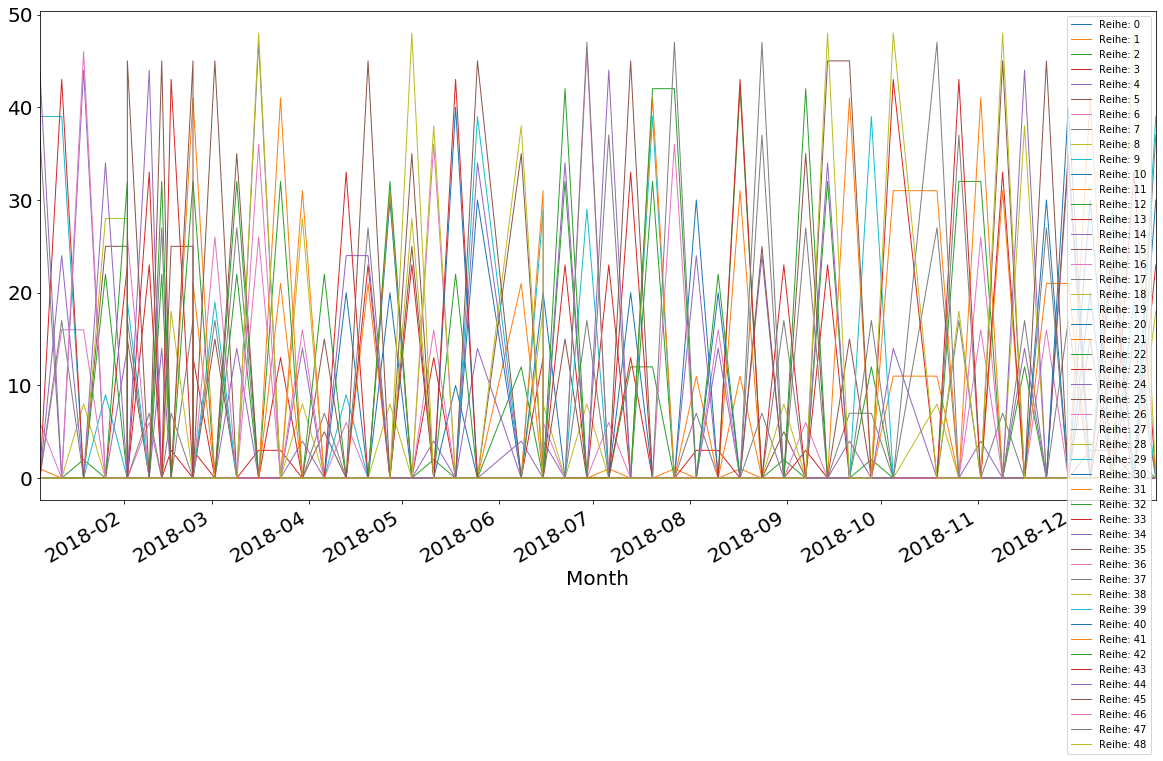

In [31]:
df.plot(figsize=(20,10), linewidth=1, fontsize=20) 
plt.xlabel('Month', fontsize=20);

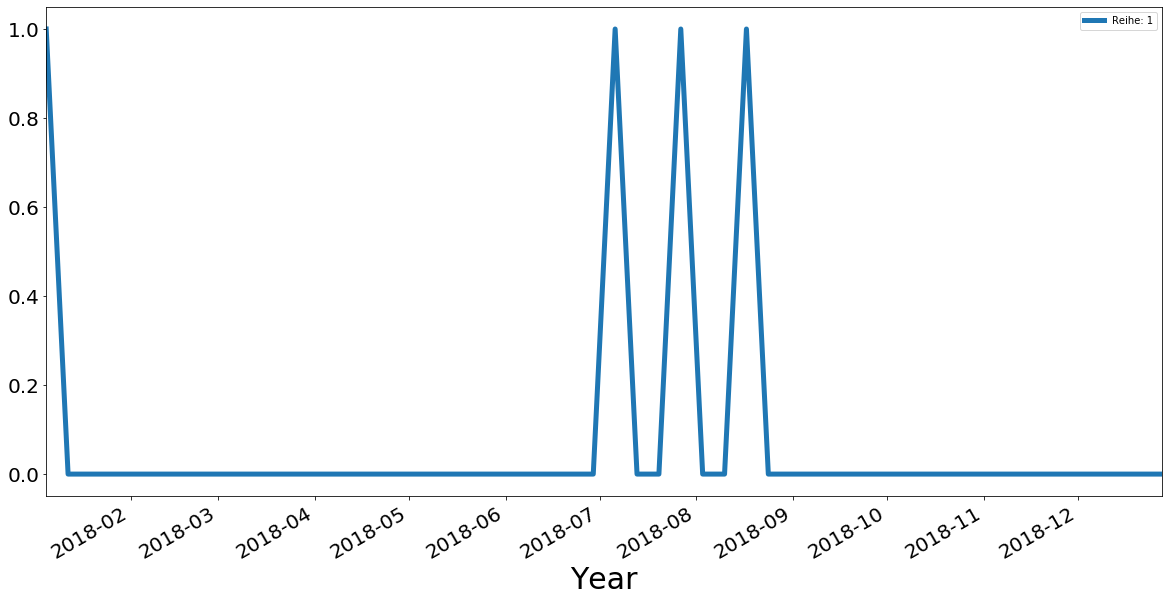

In [34]:
#dentifying Trends in Time Series Data
data1 = df[['Reihe: 1']] 
data1.rolling(1).mean().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=30);

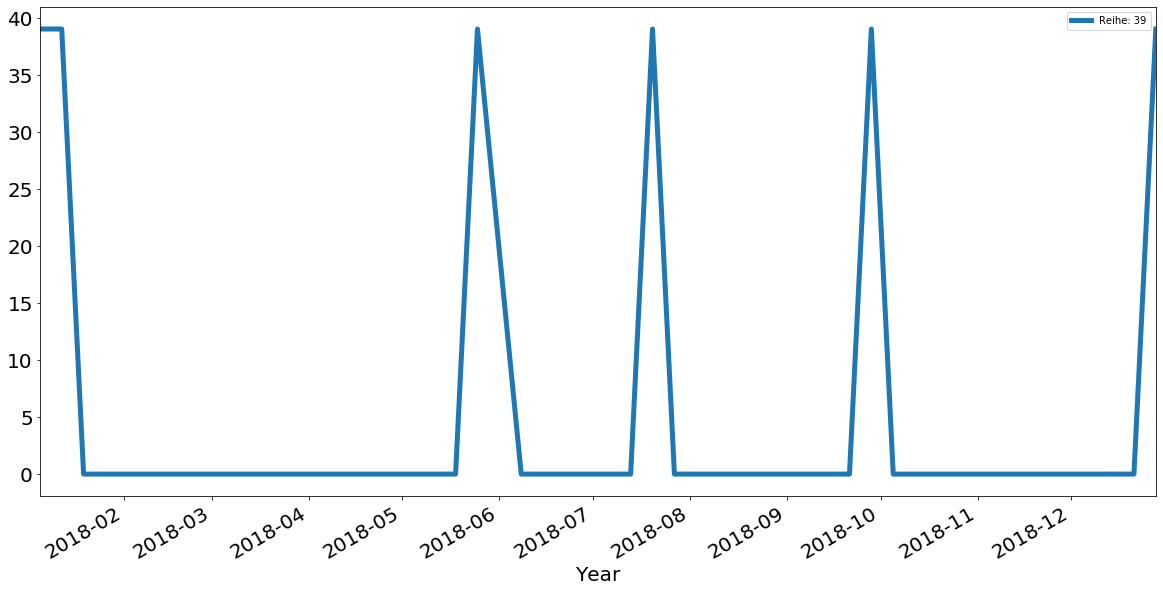

In [35]:
data39 = df[['Reihe: 39']] 
data39.rolling(1).mean().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=20);